## Import Libraries/UDFs

In [1]:
from data_cleansing_and_exploration import read_csv, check_null_values, count_zeros, correlation
from data_preparation import replace, filling, split
from MLP_modeling import split2, train_model, prediction

In [2]:
# !pip install keras
# !pip install tensorflow

## Import Dataset

In [3]:
df = read_csv()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


## Data Cleansing

In [4]:
null_values = check_null_values()
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
num_zeros = count_zeros()
num_zeros

{'Pregnancies': 301,
 'Glucose': 13,
 'BloodPressure': 90,
 'SkinThickness': 573,
 'Insulin': 956,
 'BMI': 28,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 1316}

### Correlation

In [6]:
corr = correlation()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.12,0.15,-0.06,-0.08,0.02,-0.03,0.54,0.22
Glucose,0.12,1.00,0.14,0.06,0.32,0.23,0.12,0.25,0.46
BloodPressure,0.15,0.14,1.00,0.20,0.09,0.28,0.05,0.24,0.08
SkinThickness,-0.06,0.06,0.20,1.00,0.45,0.39,0.18,-0.11,0.08
Insulin,-0.08,0.32,0.09,0.45,1.00,0.22,0.19,-0.09,0.12
BMI,0.02,0.23,0.28,0.39,0.22,1.00,0.13,0.04,0.28
DiabetesPedigreeFunction,-0.03,0.12,0.05,0.18,0.19,0.13,1.00,0.03,0.16
Age,0.54,0.25,0.24,-0.11,-0.09,0.04,0.03,1.00,0.24
Outcome,0.22,0.46,0.08,0.08,0.12,0.28,0.16,0.24,1.00


## Data Preparation (for modeling)

In [7]:
df_zero_to_nan = replace()
df_zero_to_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [8]:
df_zero_to_nan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [9]:
df_nan_to_avg = filling()
df_nan_to_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   float64
 2   BloodPressure             2000 non-null   float64
 3   SkinThickness             2000 non-null   float64
 4   Insulin                   2000 non-null   float64
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [10]:
df_nan_to_avg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.00,153.74,33.6,0.127,47,1
1,0,84.0,82.0,31.00,125.00,38.2,0.233,23,0
2,0,145.0,72.4,29.34,153.74,44.2,0.630,31,1
3,0,135.0,68.0,42.00,250.00,42.3,0.365,24,1
4,1,139.0,62.0,41.00,480.00,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.00,55.00,29.7,0.370,33,0
1996,8,179.0,72.0,42.00,130.00,32.7,0.719,36,1
1997,6,85.0,78.0,29.34,153.74,31.2,0.382,42,0
1998,0,129.0,110.0,46.00,130.00,67.1,0.319,26,1


### Train-test Split

In [11]:
X_train, X_test, y_train, y_test = split()
X_train, X_test, y_train, y_test

(      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 333            12    106.0           80.0          29.34   153.74  23.6   
 721             1    114.0           66.0          36.00   200.00  38.1   
 1352            8     85.0           55.0          20.00   153.74  24.4   
 1680            1    181.0           64.0          30.00   180.00  34.1   
 156             2     99.0           52.0          15.00    94.00  24.6   
 ...           ...      ...            ...            ...      ...   ...   
 1558            6    154.0           74.0          32.00   193.00  29.3   
 1608            9    165.0           88.0          29.34   153.74  30.4   
 493             4    125.0           70.0          18.00   122.00  28.9   
 527             3    116.0           74.0          15.00   105.00  26.3   
 1192            4     95.0           60.0          32.00   153.74  35.4   
 
       DiabetesPedigreeFunction  Age  
 333                      0.137   44  
 721    

## Modeling (Multi-Layer Perceptron)

In [12]:
# validation set from training set
X_train2, X_val, y_train2, y_val = split2()
X_train2, X_val, y_train2, y_val

(      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 330             8    118.0           72.0          19.00   153.74  23.1   
 1326            4    110.0           66.0          29.34   153.74  31.9   
 666             4    145.0           82.0          18.00   153.74  32.5   
 1753            1    112.0           80.0          45.00   132.00  34.8   
 1885            7    114.0           66.0          29.34   153.74  32.8   
 ...           ...      ...            ...            ...      ...   ...   
 1714            0    125.0           68.0          29.34   153.74  24.7   
 1478            3    129.0           64.0          29.00   115.00  26.4   
 789             6    194.0           78.0          29.34   153.74  23.5   
 1396            9    164.0           84.0          21.00   153.74  30.8   
 910             0    189.0          104.0          25.00   153.74  34.3   
 
       DiabetesPedigreeFunction  Age  
 330                      1.476   46  
 1326   

In [13]:
train_test_accuracies = train_model()



number of layers: 3
Epoch 1/200

40/40 [==============================] - 2s 5ms/step - loss: 1.3009
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6467
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6178
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6171
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6146
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6000
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6070
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6068
Epoch 9/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5932
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5956
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5979
Epoch 12/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5878
Epoch 13/200
4

40/40 [==============================] - 0s 5ms/step - loss: 0.5685
Epoch 95/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5653
Epoch 96/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5666
Epoch 97/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5655
Epoch 98/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5694
Epoch 99/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5686
Epoch 100/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5705
Epoch 101/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5649
Epoch 102/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5649
Epoch 103/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5639
Epoch 104/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5675
Epoch 105/200
40/40 [==============================] - 0s 7ms/step - loss: 0.5628
Epoch 106/200
40/40 [==============

40/40 [==============================] - 0s 5ms/step - loss: 0.5597
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5571
Epoch 196/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5611
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5588
Epoch 198/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5593
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5561
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5532
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (32, 8)                   72        
                                                                 
 layer2 (Dense)              (32, 8)                   72        
                                                                 
 layer3 (Dense)         

In [14]:
train_test_accuracies

(0.693, 0.738)

number of layers: 3
Epoch 1/200
40/40 [==============================] - 1s 5ms/step - loss: 0.7934
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6585
Epoch 3/200
40/40 [==============================] - 0s 6ms/step - loss: 0.6413
Epoch 4/200
40/40 [==============================] - 0s 6ms/step - loss: 0.6326
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.6285
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6289
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6305
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6284
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6251
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6204
Epoch 11/200
40/40 [==============================] - 0s 7ms/step - loss: 0.6127
Epoch 12/200
40/40 [==============================] - 0s 8ms/step - loss: 0.6156
Epoch 13/200
40/4

Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5332
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 0.5387
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5410
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5333
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5357
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5486
Epoch 108/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5334
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5346
Epoch 110/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5373
Epoch 111/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5385
Epoch 112/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5379
Epoch 113/200
40/40 [==============================] - 0s 6ms/step - loss: 0.5337
Epoch 114/200
40

 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (32, 8)                   72        
                                                                 
 layer2 (Dense)              (32, 8)                   72        
                                                                 
 layer3 (Dense)              (32, 1)                   9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
40/40 [==============================] - 0s 4ms/step
1280
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[1. 1. 1. ... 1. 1. 1.]
training data model accuracy: 0.7359375; training data model log loss: nan
13/13 [==============================] - 0s 4ms/step
400
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]

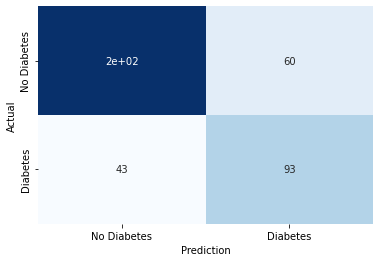

array([[204,  60],
       [ 43,  93]], dtype=int64)

<Figure size 432x288 with 0 Axes>

In [15]:
confusion_mat = prediction()
confusion_mat